In [1]:
from astropy.io import fits
from scipy.interpolate import interp1d
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as ima


/home/pedro/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# OPE

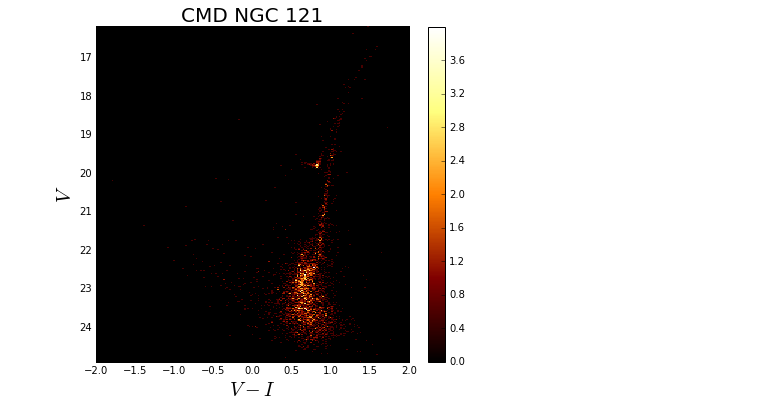

In [2]:
from astropy.coordinates import match_coordinates_sky
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.io import ascii   
%matplotlib inline

#----------------------f555-------------------------------
fil = open("./f555.cat","r") 
body = ascii.read(fil)

RA1 = np.array(body["ALPHA_J2000"])
DEC1 = np.array(body["DELTA_J2000"])
MAG1 = np.array(body["MAG_APER"]) + 2.5*np.log10(0.656) + 0.101  # Mag_source - Mag_ap - Mag_rd
MAG_ERR1 = np.array(body["MAGERR_APER"])

fil.close()

#----------------------f814-------------------------------
fil = open("./f814.cat","r") 
body = ascii.read(fil)

RA2 = np.array(body["ALPHA_J2000"])
DEC2 = np.array(body["DELTA_J2000"])
MAG2 = np.array(body["MAG_APER"]) + 2.5*np.log10(0.534) + 0.056 # Mag_source - Mag_ap - Mag_rd
MAG_ERR2 = np.array(body["MAGERR_APER"])

fil.close()

c = SkyCoord(ra=RA2*u.degree, dec=DEC2*u.degree)  
catalog = SkyCoord(ra=RA1*u.degree, dec=DEC1*u.degree)  
idx, d2d, d3d = match_coordinates_sky(c, catalog)

MAG_COLOR = []
MAG_V = []
MAG_I = []

for i in range(0,len(RA2)):
    V_o = MAG1[idx[i]]
    I_o = MAG2[i]
    V = V_o
    I = I_o
    for i in range(0,11):
        color = V - I
        if color < 0.6:
            V = V_o + 25.25 - 0.09*color + 0.034*color**2
        else:
            V = V_o + 25.275 - 0.124*color + 0.018*color**2
        if color  < 0.1:
            I = I_o + 24.837 +0.06*color - 0.099*color**2
        else:
            I = I_o + 24.838 + 0.001*color + 0.013*color**2
    
    MAG_COLOR.append(color)
    MAG_V.append(V)
    MAG_I.append(I)

plt.figure(figsize=(7,6))
plt.title("CMD NGC 121",size=20)
plt.xlabel('$V-I$',size=20)
plt.ylabel('$V$',size=20)
plt.hist2d(MAG_COLOR, MAG_V, bins=500,cmap = "afmhot",normed=True)
plt.colorbar()
plt.xlim(-2,2)
plt.ylim(np.min(MAG_V),np.max(MAG_V))
plt.gca().invert_yaxis()


HOLA HOLA


<Container object of 3 artists>

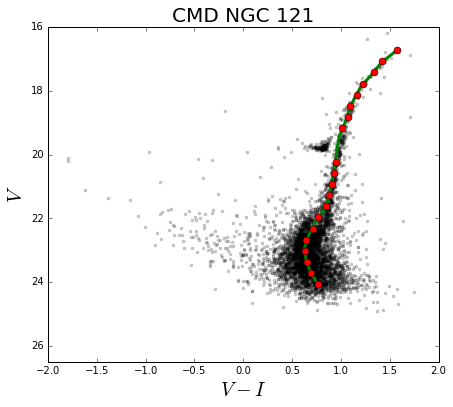

In [3]:

plt.figure(figsize=(7,6))
plt.xlim(-2,2)
plt.ylim(16,26.5)
plt.gca().invert_yaxis()
plt.title("CMD NGC 121",size=20)
plt.xlabel('$V-I$',size=20)
plt.ylabel('$V$',size=20)
plt.errorbar(MAG_COLOR,MAG_V, fmt='.',color='k', alpha = 0.2)


ap = []
i = np.min(MAG_V)
bin_w = 0.35
while i < np.max(MAG_V):
    aux = []
    for element in MAG_V:
        if element > i and element < i + bin_w:
            aux.append([(2*i + bin_w)/2,MAG_COLOR[MAG_V.index(element)]])
    if aux != []:
        ap.append(np.array(aux))
    i += bin_w

ap1 = ap[11:]
ap2 = ap[:9]
ap1 = ap1[:-2]
ap2 = ap2[1:]
tot = np.concatenate((ap1,ap2),axis=0)
x = []
y = []
for element in tot:
    color = element[:,1]
    mediana = np.median(color)
    x.append(mediana)
    mag = element[:,0]
    y.append(np.extract(mediana,mag)[0])

x = np.array(x)
y = np.array(y)    

f = interp1d(y, x, kind='cubic')
xnew = np.linspace(np.min(y), np.max(y), 20, endpoint=True)
plt.plot(f(xnew), xnew, 'g', lw=3)
plt.errorbar(x,y, fmt='o',color='r',markersize = 7)

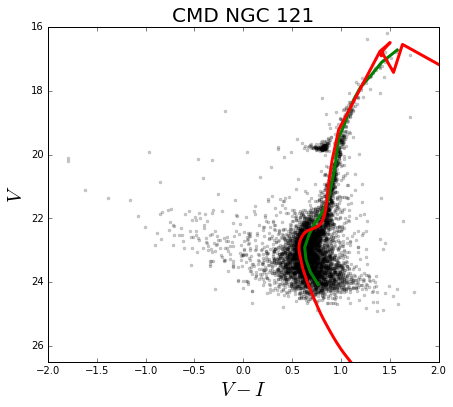

In [6]:
from isochrones.dartmouth import Dartmouth_Isochrone

def isoc(age, feh, mod_dis):
    iso = Dartmouth_Isochrone(bands=['V','I'])
    model = iso.isochrone(age=np.log10(age), feh=feh, dm=0.001)
    model_V = model.V_mag + mod_dis + 0.123
    model_I = model.I_mag + mod_dis + 0.072
    model_VI = model_V - model_I
    return model_V, model_VI

model_V, model_VI = isoc(11.5*10**9,-1.5,18.94)

plt.figure(figsize=(7,6))
plt.xlim(-2,2)
plt.ylim(16,26.5)
plt.gca().invert_yaxis()
plt.title("CMD NGC 121",size=20)
plt.xlabel('$V-I$',size=20)
plt.ylabel('$V$',size=20)

plt.errorbar(MAG_COLOR,MAG_V, fmt='.',color='k', alpha = 0.2)

plt.plot(f(xnew), xnew, 'g', lw=3)

plt.plot(model_VI,model_V,'r',lw = 3)


### Referncias
